In [1]:
import pandas as pd

In [2]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [3]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [4]:
from konlpy.tag import Twitter 
from collections import Counter

In [50]:
final = pd.read_csv('./data/중복제거_전처리완료.csv')

In [51]:
final.head()

,title,genre
0,우리 사랑하게 됐어요.,['댄스']
1,너 때문에,['댄스']
2,Bo Peep Bo Peep,['댄스']
3,오늘 헤어졌어요,['발라드']
4,처음처럼 그때처럼,['발라드']


In [52]:
# final = final[['title','genre']]

In [53]:
# final.to_csv('final_genre.csv', index = False)

In [54]:
final.shape

(6489, 2)

In [55]:
final.groupby('genre').size().sort_values(ascending = False)

genre
['발라드']                            2158
['댄스']                             1421
['랩/힙합']                            961
['R&B/Soul']                        521
['발라드', '국내드라마']                    509
['록/메탈']                            321
['POP']                              67
['인디음악', '포크/블루스']                   66
['포크/블루스']                           56
['댄스', '국내드라마']                      45
['인디음악', '록/메탈']                     45
['일렉트로니카']                           35
['국내드라마']                            34
['발라드', '인디음악']                      33
['랩/힙합', '인디음악']                     28
['발라드', 'R&B/Soul', '국내드라마']         18
['록/메탈', '국내드라마']                    14
['댄스', '랩/힙합']                       13
['발라드', '국내영화']                      13
['포크/블루스', '국내드라마']                  12
['R&B/Soul', '국내드라마']                12
['랩/힙합', '국내드라마']                    11
['인디음악', '일렉트로니카']                   10
['POP', '록/메탈']                       7
['록/메탈', '국외영화']                  

# 4. 인디

In [56]:
# 인디 = final[final['genre'] == '인디']
인디 = final[final['genre'].str.contains('인디')]

In [57]:
인디

,title,genre
237,"Easy Come, Easy Go","['인디음악', '일렉트로니카']"
272,고백,"['인디음악', '록/메탈']"
399,한숨이 늘었어,"['발라드', '인디음악']"
822,졸업,"['인디음악', '록/메탈']"
926,우리는 선처럼 가만히 누워,"['인디음악', '포크/블루스']"
...,...,...
6410,조금 취했어,"['발라드', '인디음악']"
6433,있어줘요,"['발라드', '인디음악']"
6435,전화를 할까봐,"['랩/힙합', '인디음악']"
6449,혼코노 (Honkono),"['발라드', '인디음악']"


In [58]:
인디 = 인디['title']

In [59]:
인디.to_csv('중복제거_인디.txt', index = False)

# 텍스트 파일 불러오기

In [15]:
file = open("중복제거_인디.txt", 'r') 
lists = file.readlines() 
file.close() 
lists

['"Easy Come, Easy Go "\n',
 '고백\n',
 '한숨이 늘었어 \n',
 '졸업\n',
 '우리는 선처럼 가만히 누워 \n',
 '그게 아니고\n',
 'Like A Virgin \n',
 '나쁜습관 \n',
 '아메리카노\n',
 '너무 그리워\n',
 '아무 것도 아닌 나\n',
 '햇살이 눈부신 어느 날 어렴풋이 그대 생각이 나겠지요\n',
 '그렇고 그런 사이\n',
 '사랑은 은하수 다방에서\n',
 '안아줘요\n',
 '선물할게\n',
 '새벽녘\n',
 '잔인한 사월\n',
 '사랑이 방울지네\n',
 'Fine Thank You And You?\n',
 '한강의 작별\n',
 '오늘밤에\n',
 '냄새나는 여자\n',
 '너의 꽃\n',
 '고추잠자리\n',
 '그러니까...\n',
 '마음\n',
 '이제.여기서.그만\n',
 'Corona\n',
 'more & more\n',
 'LOVE JAM (with Bebop)\n',
 '오예\n',
 'Nothing Without You\n',
 '근데 나 졸려\n',
 '모닝콜\n',
 'Don`t Let Me Go\n',
 '지구인?\n',
 'Rachel\n',
 'HOTpants\n',
 '새로와\n',
 'Rewind \n',
 'Human Zoo \n',
 '괜찮습니다\n',
 '줄 수 있어 \n',
 '잊혀지겠지 \n',
 'Rollercoaster \n',
 '장난 아니야 \n',
 '그사람 사랑하지마 \n',
 '사랑한다 말할까봐\n',
 '봉숙이\n',
 'Once Again \n',
 '말만해 (What You Want) \n',
 '위험해 (Dangerous) \n',
 '장가가고 싶은 남자 시집가고 싶은 여자\n',
 '넌 이별 난 아직 \n',
 '"Dali, Van, Picasso"\n',
 '놈 \n',
 '너만 보여 \n',
 '내게기대 \n',
 'I`m Good\n',
 '뒹굴뒹굴\n',
 '"그래, 너"\n',
 '안드로메다\n',
 '한 번

# 형태소 나누기

In [16]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

# 명사, 형용사, 부사만 골라내기

In [17]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['고백', '한숨', '졸업', '우리', '선', '습관', '아메리카노', '아무', '햇살', '날', '그대', '생각', '사이', '사랑', '다방', '선물', '새벽녘', '사월', '사랑', '방울', '지네', '한강', '작별', '오늘밤', '냄새', '여자', '너', '꽃', '고추잠자리', '마음', '이제', '여기', '오예', '모닝콜', '지구인', '줄', '장난', '사람', '사랑', '사랑', '봉', '만해', '장가', '남자', '여자', '넌', '이별', '난', '놈', '너', '기대', '너', '안드로메다', '번', '니', '먼저', '너', '몸', '스토커', '와리', '위잉위잉', '공', '새', '날씨', '너', '우연', '선', '뭐', '무지개', '봄', '뚝뚝', '뚝', '냉탕', '상어', '여름밤', '우린', '우주', '줄', '연애', '심술', '너', '사랑', '때', '기억', '잠깐', '우리', '집', '못', '바램', '네', '생각', '가죽', '자켓', '남', '라면', '작두', '폰서트', '오늘', '밤', '걔', '썸', '사춘기', '상상', '바보', '비행운', '비', '날', '끝', '에덴', '욕심', '자취', '방', '여행', '바람', '사람', '야경', '안녕', '곰인형', '동화', '매트리스', '혹시', '행복', '습관', '이', '노래', '클럽', '기억', '너', '세상', '봄', '날', '여자친구', '주저', '연인', '위해', '봄', '별', '갈래', '여름밤', '건', '볼품', '사랑', '인연', '우리', '시간', '자꾸', '마음', '이별', '날씨', '우린', '어디', '대충', '불면', '오늘', '너', '살', '있', '인사', '날', '뭐', '방', '모기', '허물', '꿈속', '너', '워커홀릭', '낮', '니', '마음', '조금', '취

# 빈도수대로 정렬하기

In [18]:
count = Counter(noun_adj_adv_list)

In [19]:
words = dict(count.most_common())

In [20]:
words

{'너': 9,
 '사랑': 6,
 '날': 4,
 '우리': 3,
 '마음': 3,
 '봄': 3,
 '선': 2,
 '습관': 2,
 '생각': 2,
 '여자': 2,
 '줄': 2,
 '사람': 2,
 '이별': 2,
 '니': 2,
 '날씨': 2,
 '뭐': 2,
 '여름밤': 2,
 '우린': 2,
 '기억': 2,
 '오늘': 2,
 '방': 2,
 '고백': 1,
 '한숨': 1,
 '졸업': 1,
 '아메리카노': 1,
 '아무': 1,
 '햇살': 1,
 '그대': 1,
 '사이': 1,
 '다방': 1,
 '선물': 1,
 '새벽녘': 1,
 '사월': 1,
 '방울': 1,
 '지네': 1,
 '한강': 1,
 '작별': 1,
 '오늘밤': 1,
 '냄새': 1,
 '꽃': 1,
 '고추잠자리': 1,
 '이제': 1,
 '여기': 1,
 '오예': 1,
 '모닝콜': 1,
 '지구인': 1,
 '장난': 1,
 '봉': 1,
 '만해': 1,
 '장가': 1,
 '남자': 1,
 '넌': 1,
 '난': 1,
 '놈': 1,
 '기대': 1,
 '안드로메다': 1,
 '번': 1,
 '먼저': 1,
 '몸': 1,
 '스토커': 1,
 '와리': 1,
 '위잉위잉': 1,
 '공': 1,
 '새': 1,
 '우연': 1,
 '무지개': 1,
 '뚝뚝': 1,
 '뚝': 1,
 '냉탕': 1,
 '상어': 1,
 '우주': 1,
 '연애': 1,
 '심술': 1,
 '때': 1,
 '잠깐': 1,
 '집': 1,
 '못': 1,
 '바램': 1,
 '네': 1,
 '가죽': 1,
 '자켓': 1,
 '남': 1,
 '라면': 1,
 '작두': 1,
 '폰서트': 1,
 '밤': 1,
 '걔': 1,
 '썸': 1,
 '사춘기': 1,
 '상상': 1,
 '바보': 1,
 '비행운': 1,
 '비': 1,
 '끝': 1,
 '에덴': 1,
 '욕심': 1,
 '자취': 1,
 '여행': 1,
 '바람': 1,
 '야경': 1,
 '안녕': 

# 사랑,사람 너 제거

In [21]:
del words['사랑']
del words['사람']
del words['너']

# 워드 클라우드 만들기

In [22]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

import nltk 
from nltk.corpus import stopwords

In [23]:
%matplotlib inline 
import matplotlib
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


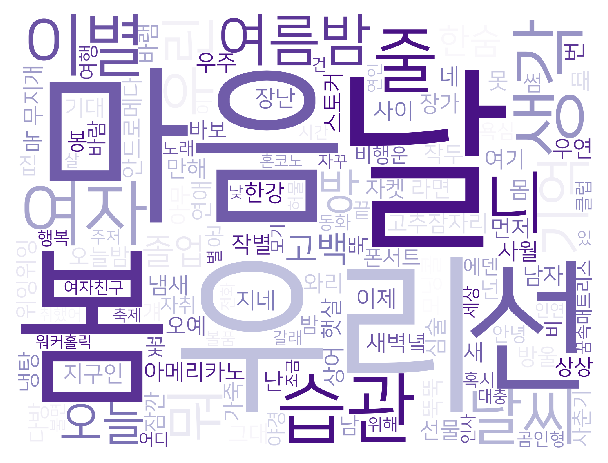

In [24]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='White',colormap = "Purples", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [59]:
from PIL import Image
import numpy as np

In [60]:
alice_mask = np.array(Image.open("./alice_mask.png"))

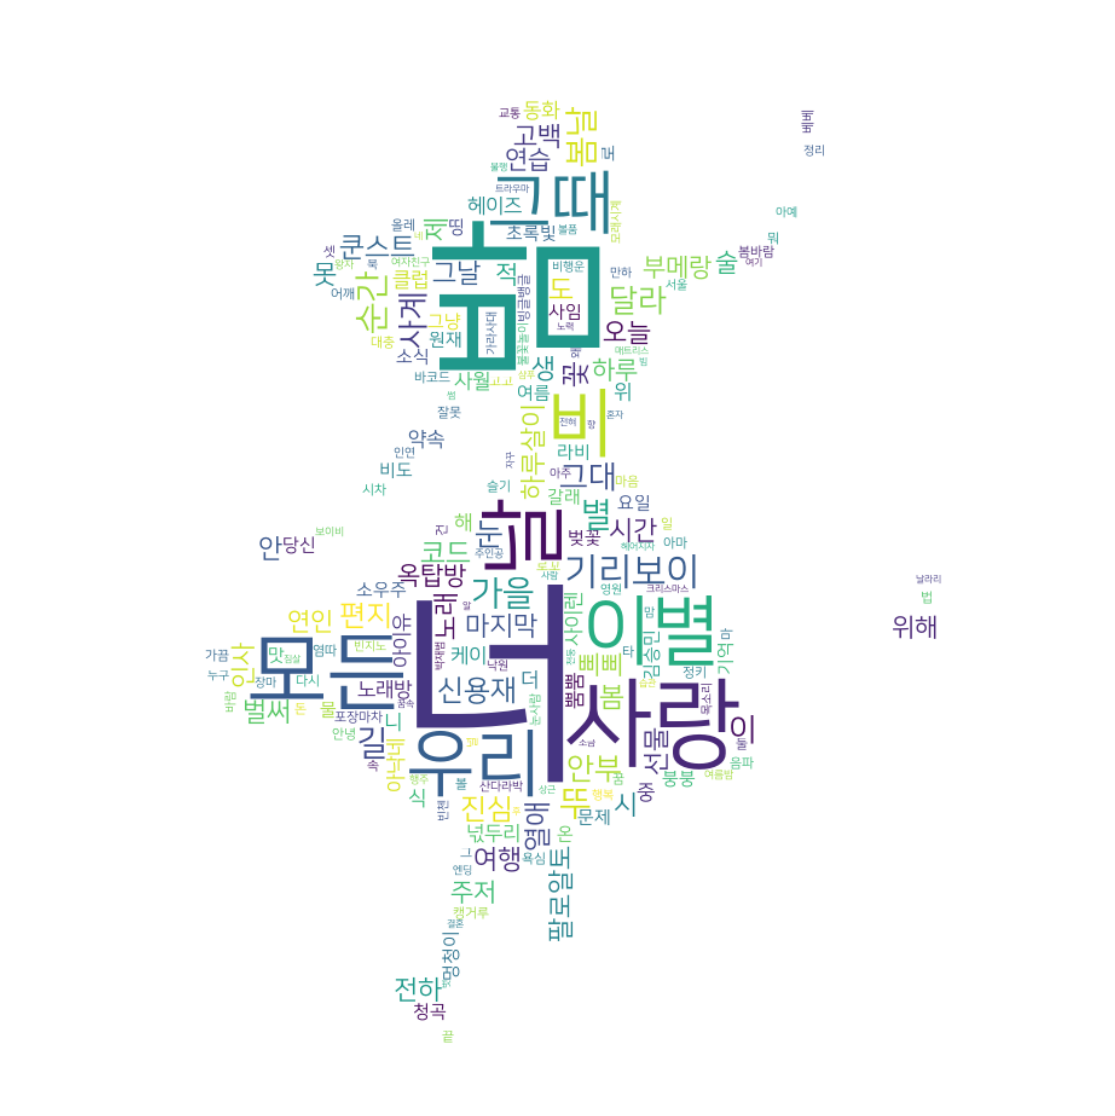

In [62]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()